In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pieces = []
for year in range(1880, 2011):
    path = f"babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame["year"] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [3]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"]).apply(add_prop)

C:\Users\user\AppData\Local\Temp\ipykernel_7380\2813635758.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  names = names.groupby(["year", "sex"]).apply(add_prop)


In [4]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [5]:
top1000 = top1000.reset_index(drop=True)

In [6]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

In [7]:
total_births = top1000.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

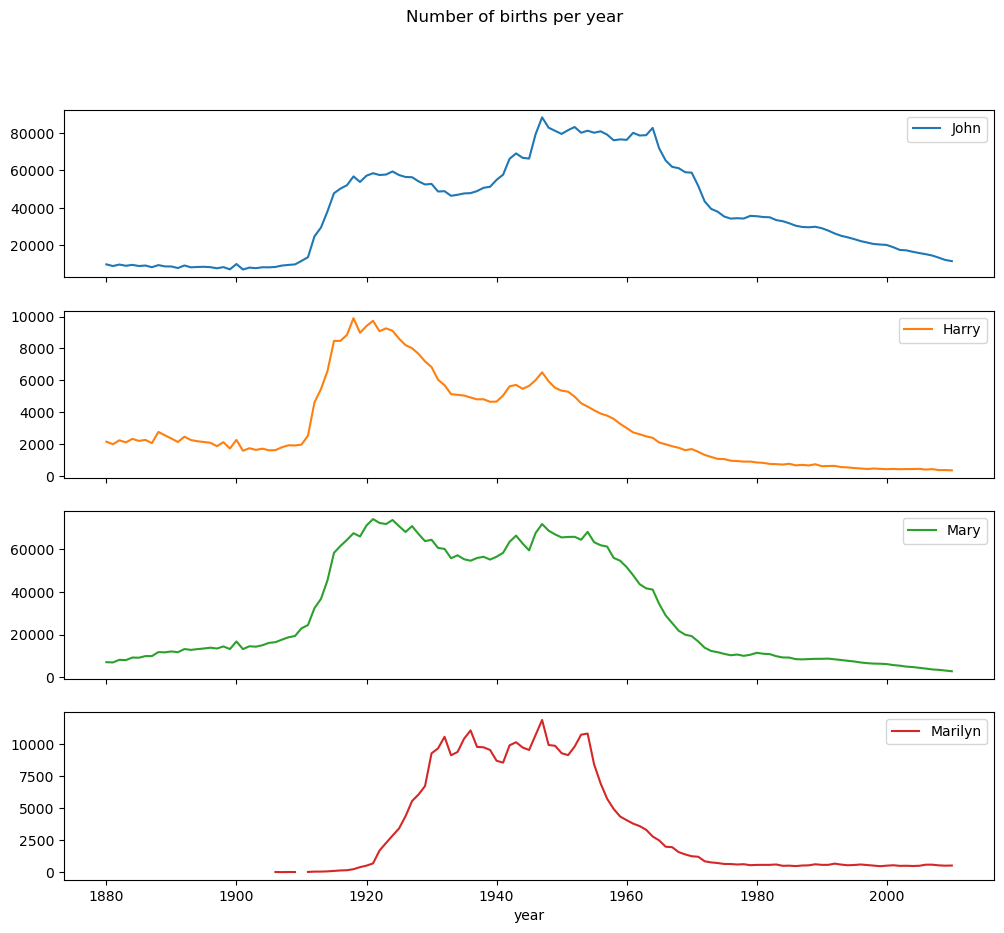

In [8]:
total_births.info()
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 10),
            title="Number of births per year")

<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

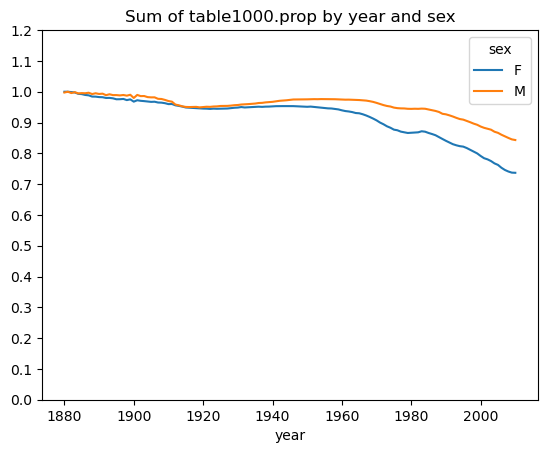

In [9]:
table = top1000.pivot_table("prop", index="year",
                            columns="sex", aggfunc=sum)
table.plot(title="Sum of table1000.prop by year and sex",
           yticks=np.linspace(0, 1.2, 13))

In [10]:
df = boys[boys["year"] == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [11]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]
prop_cumsum.searchsorted(0.5)

116

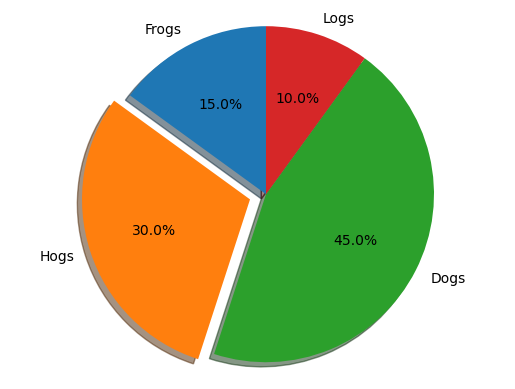

In [15]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [18]:
%matplotlib inline

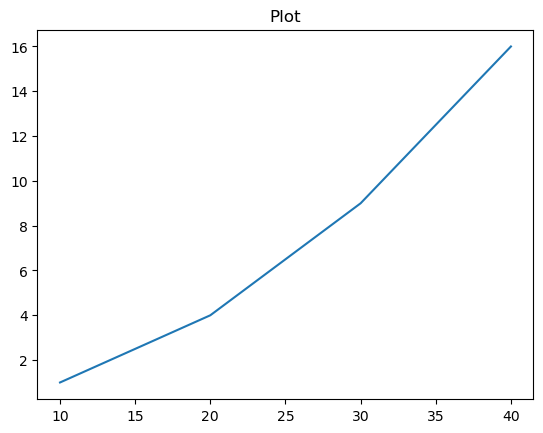

In [23]:
#라인플롯
plt.title("Plot")
#plt.plot([1, 4, 9, 16])
plt.plot([10,20,30,40], [1, 4, 9, 16])
#plt.show()

In [25]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore")

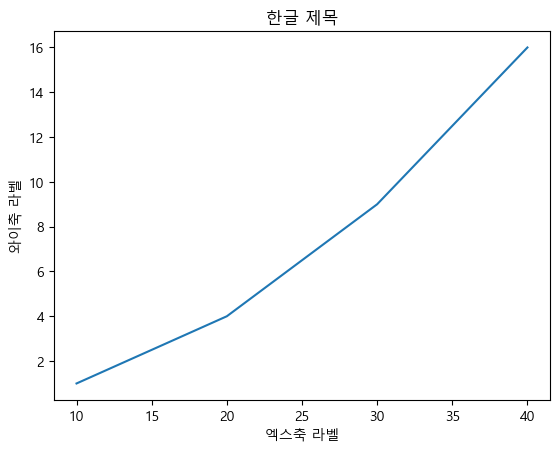

In [26]:
plt.title('한글 제목')
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.xlabel("엑스축 라벨")
plt.ylabel("와이축 라벨")
plt.show()

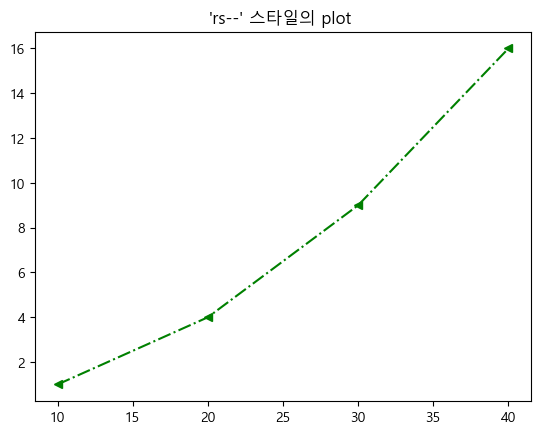

In [34]:
plt.title("'rs--' 스타일의 plot ")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], 'g<-.')
plt.show()

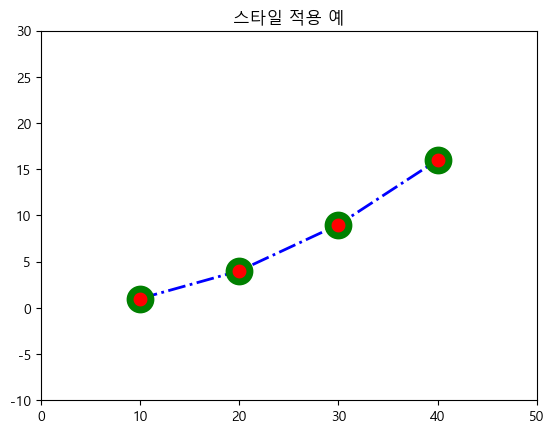

In [51]:
#plt.plot([10, 20, 30, 40], [1, 4, 9, 16], c="b",
#         lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")

plt.plot([10, 20, 30, 40], [1, 4, 9, 16], c="b", lw=2, ls="-.", marker="o",  ms=15, mec="g", mew=5, mfc="r")

plt.xlim(0, 50)
plt.ylim(-10, 30)
plt.title("스타일 적용 예")
plt.show()

In [53]:
X = np.linspace(-np.pi, np.pi, 256)
X

array([-3.14159265, -3.11695271, -3.09231277, -3.06767283, -3.04303288,
       -3.01839294, -2.993753  , -2.96911306, -2.94447311, -2.91983317,
       -2.89519323, -2.87055329, -2.84591335, -2.8212734 , -2.79663346,
       -2.77199352, -2.74735358, -2.72271363, -2.69807369, -2.67343375,
       -2.64879381, -2.62415386, -2.59951392, -2.57487398, -2.55023404,
       -2.52559409, -2.50095415, -2.47631421, -2.45167427, -2.42703432,
       -2.40239438, -2.37775444, -2.3531145 , -2.32847456, -2.30383461,
       -2.27919467, -2.25455473, -2.22991479, -2.20527484, -2.1806349 ,
       -2.15599496, -2.13135502, -2.10671507, -2.08207513, -2.05743519,
       -2.03279525, -2.0081553 , -1.98351536, -1.95887542, -1.93423548,
       -1.90959553, -1.88495559, -1.86031565, -1.83567571, -1.81103577,
       -1.78639582, -1.76175588, -1.73711594, -1.712476  , -1.68783605,
       -1.66319611, -1.63855617, -1.61391623, -1.58927628, -1.56463634,
       -1.5399964 , -1.51535646, -1.49071651, -1.46607657, -1.44

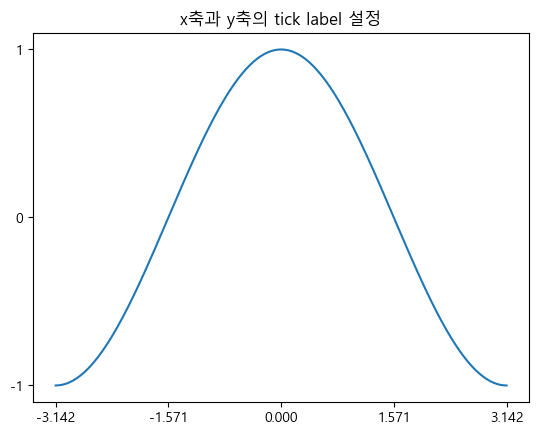

In [52]:
C = np.cos(X)
plt.title("x축과 y축의 tick label 설정")
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.yticks([-1, 0, +1])
plt.show()

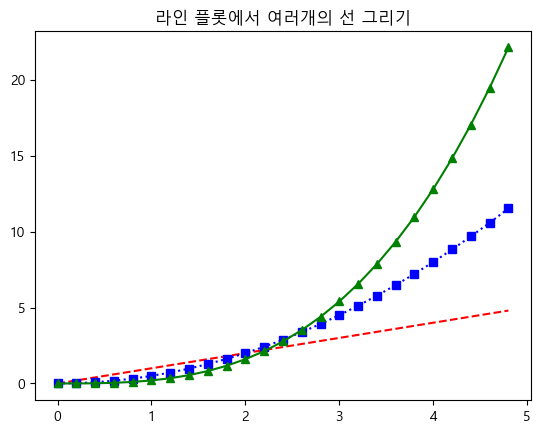

In [54]:
t = np.arange(0., 5., 0.2)
plt.title("라인 플롯에서 여러개의 선 그리기")
plt.plot(t, t, 'r--', t, 0.5 * t**2, 'bs:', t, 0.2 * t**3, 'g^-')
plt.show()

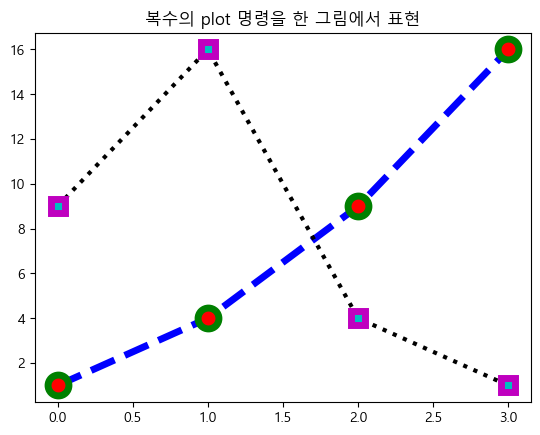

In [55]:
plt.title("복수의 plot 명령을 한 그림에서 표현")
plt.plot([1, 4, 9, 16],
         c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.plot([9, 16, 4, 1],
         c="k", lw=3, ls=":", marker="s", ms=10, mec="m", mew=5, mfc="c")
plt.show()

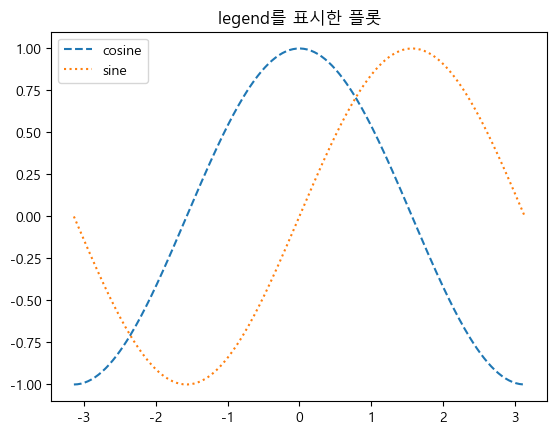

In [58]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.title("legend를 표시한 플롯")
plt.plot(X, C, ls="--", label="cosine")
plt.plot(X, S, ls=":", label="sine")
plt.legend()
plt.show()


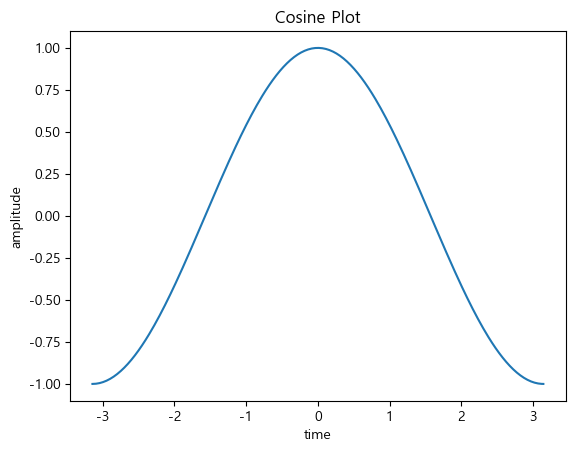

In [59]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C, label="cosine")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Cosine Plot")
plt.show()

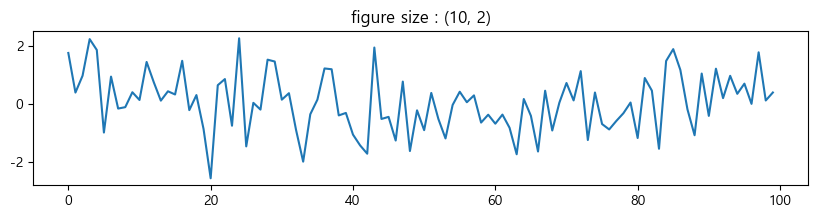

In [60]:
np.random.seed(0)
f1 = plt.figure(figsize=(10, 2)) #도화지
plt.title("figure size : (10, 2)")
plt.plot(np.random.randn(100))
plt.show()

In [68]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)


In [69]:
x1

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [63]:
x2

array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ])

In [64]:
y1

array([ 1.        ,  0.72367065,  0.2320026 , -0.25429107, -0.55721991,
       -0.59913951, -0.41280458, -0.10893327,  0.17893551,  0.34780448,
        0.35748852,  0.23380958,  0.04690762, -0.12275601, -0.21591812,
       -0.21241248, -0.13137462, -0.01694367,  0.08259904,  0.1333648 ,
        0.12567347,  0.0731473 ,  0.00339549, -0.05472957, -0.08198104,
       -0.07402828, -0.04029719,  0.00203856,  0.03580865,  0.05016511,
        0.04340781,  0.02192149, -0.00366666, -0.0231816 , -0.03056191,
       -0.02533133, -0.01174303,  0.00365889,  0.01487088,  0.0185398 ,
        0.01470776,  0.00616987, -0.00306273, -0.00946371, -0.01119988,
       -0.00849338, -0.00316048,  0.00235117,  0.00597998,  0.00673795])

In [65]:
y2

array([ 1.        ,  0.96729486,  0.8713187 ,  0.71834935,  0.51839257,
        0.28452759,  0.03205158, -0.22252093, -0.46253829, -0.67230089,
       -0.8380881 , -0.94905575, -0.99794539, -0.98155916, -0.90096887,
       -0.76144596, -0.57211666, -0.34536505, -0.09602303,  0.1595999 ,
        0.40478334,  0.6234898 ,  0.80141362,  0.92691676,  0.99179001,
        0.99179001,  0.92691676,  0.80141362,  0.6234898 ,  0.40478334,
        0.1595999 , -0.09602303, -0.34536505, -0.57211666, -0.76144596,
       -0.90096887, -0.98155916, -0.99794539, -0.94905575, -0.8380881 ,
       -0.67230089, -0.46253829, -0.22252093,  0.03205158,  0.28452759,
        0.51839257,  0.71834935,  0.8713187 ,  0.96729486,  1.        ])

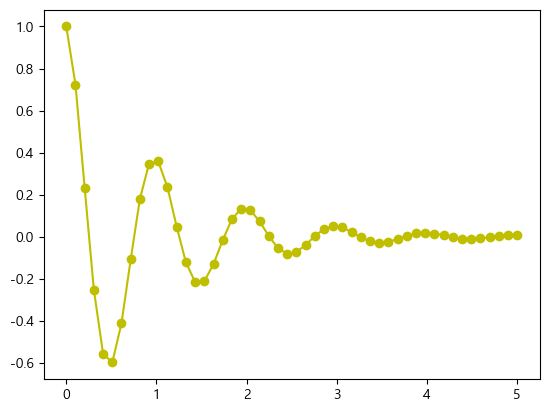

In [71]:
plt.plot(x1,y1, 'yo-')

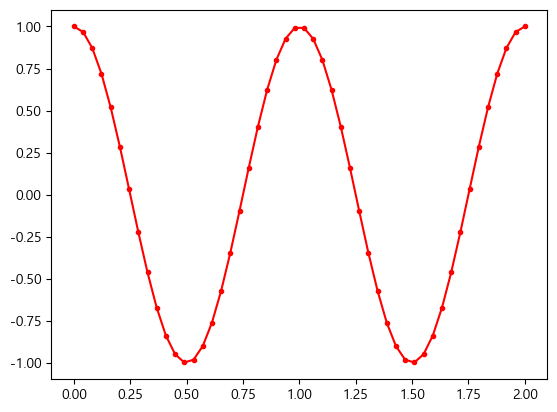

In [72]:
plt.plot(x2,y2, 'r.-')

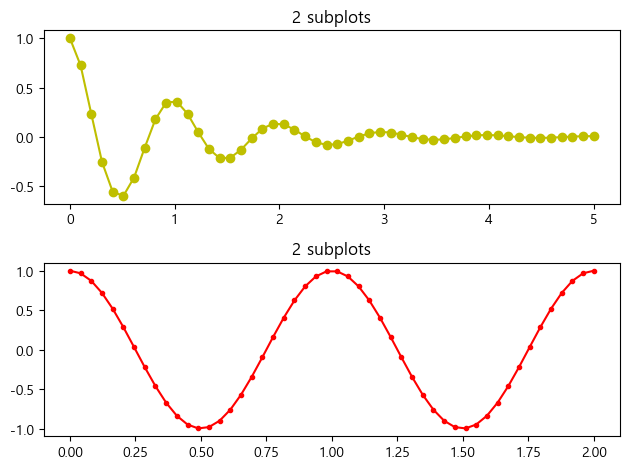

In [81]:
plt.subplot(2,1, 1) #figure를 2줄,1칸,첫번째 칸(윗칸)
plt.title("2 subplots")
plt.plot(x1,y1, 'yo-')

plt.subplot(2,1, 2) 
plt.title("2 subplots")
plt.plot(x2,y2, 'r.-')

plt.tight_layout()

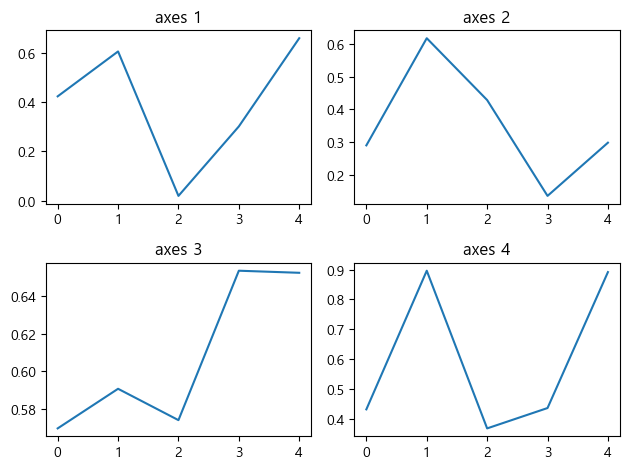

In [82]:
plt.subplot(221) #2줄2칸, 1번째 칸
plt.plot(np.random.rand(5))
plt.title("axes 1")

plt.subplot(222)
plt.plot(np.random.rand(5))
plt.title("axes 2")

plt.subplot(223)
plt.plot(np.random.rand(5))
plt.title("axes 3")

plt.subplot(224)
plt.plot(np.random.rand(5))
plt.title("axes 4")

plt.tight_layout()

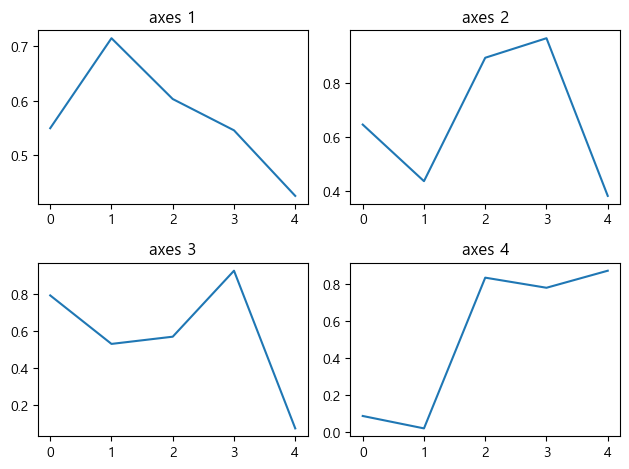

In [84]:
fig, axes = plt.subplots(2, 2)

np.random.seed(0)
axes[0, 0].plot(np.random.rand(5))
axes[0, 0].set_title("axes 1")
axes[0, 1].plot(np.random.rand(5))
axes[0, 1].set_title("axes 2")
axes[1, 0].plot(np.random.rand(5))
axes[1, 0].set_title("axes 3")
axes[1, 1].plot(np.random.rand(5))
axes[1, 1].set_title("axes 4")

plt.tight_layout()

In [86]:
print(fig)

Figure(640x480)


Text(0.5, 0, '공유되는 x축')

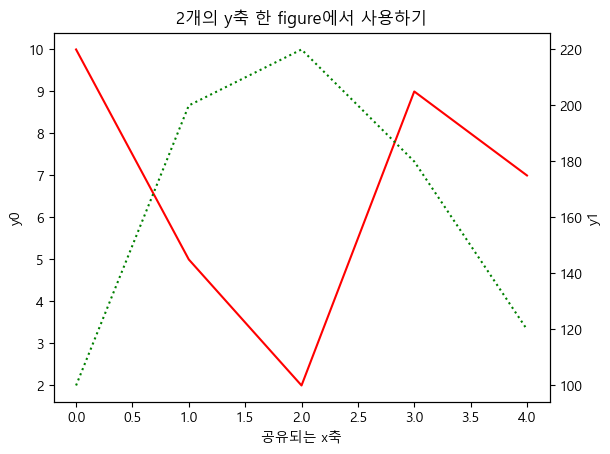

In [87]:
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.set_title("2개의 y축 한 figure에서 사용하기")
ax0.plot([10, 5, 2, 9, 7], 'r-', label="y0")
ax0.set_ylabel("y0")
ax0.grid(False)
ax1.plot([100, 200, 220, 180, 120], 'g:', label="y1")
ax1.set_ylabel("y1")
ax1.grid(False)
ax0.set_xlabel("공유되는 x축")

<Axes: >

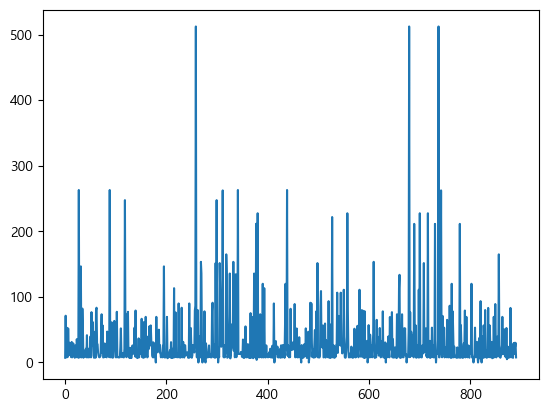

In [92]:
#타이타닉 train 데이터의 운임을 선그래프 출력
df = pd.read_csv('titanic/train.csv')
Fare = df['Fare']

#Fare.plot()   시리즈.plot()
plt.plot(Fare)  #plt.plot(시리즈)

In [ ]:
#종류별 데이터 건수를 시각화 : 막대 그래프

([<matplotlib.axis.YTick at 0x1da3d4fcdd0>,
 [Text(0, 2, '2'), Text(0, 3, '3'), Text(0, 1, '1')])

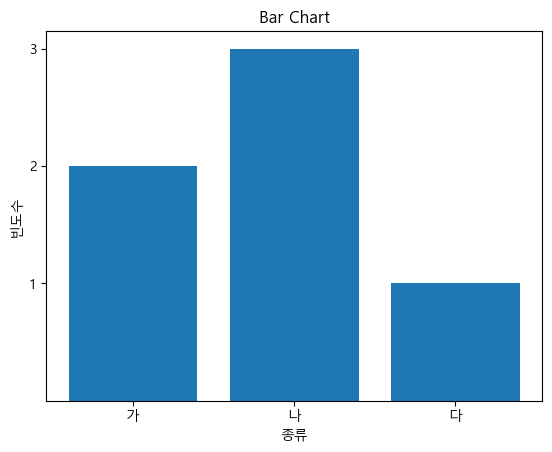

In [97]:
y = [2, 3, 1]
x = np.arange(len(y)) # X=[0, 1, 2]
xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x,xlabel )
plt.xlabel("종류")
plt.ylabel("빈도수")

plt.yticks(y)


Text(0.5, 0, 'x 라벨')

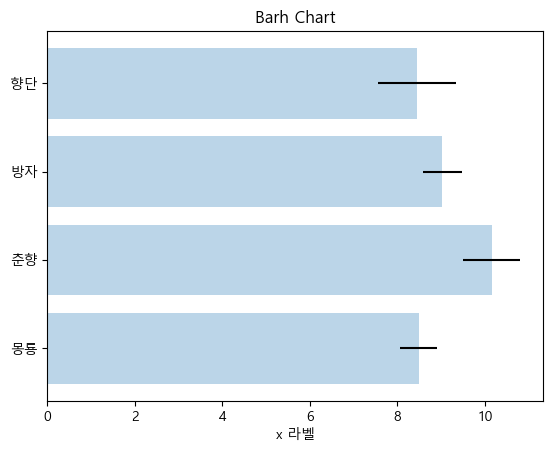

In [102]:
np.random.seed(0)

people = ['몽룡', '춘향', '방자', '향단']
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.title("Barh Chart")
plt.barh(y_pos, performance, xerr=error, alpha=0.3)
plt.yticks(y_pos, people)
plt.xlabel('x 라벨')

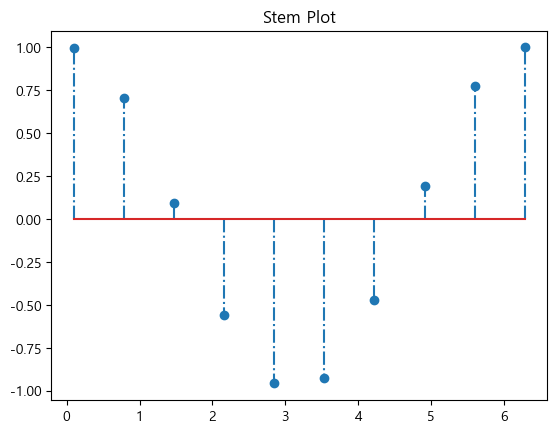

In [103]:
x = np.linspace(0.1, 2 * np.pi, 10)
plt.title("Stem Plot")
plt.stem(x, np.cos(x), '-.')
plt.show()

(-1.0999843660947277,
 1.0999992555283205,
 -1.199859399720717,
 1.1047438740833695)

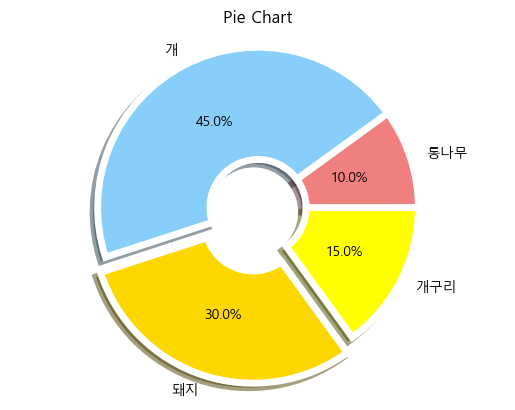

In [114]:
labels = ['개구리', '돼지', '개', '통나무']
sizes = [15, 30, 45, 10]
colors = ['#ffff00', 'gold', 'lightskyblue', 'lightcoral']
explode = [0, 0.1, 0, 0]
plt.title("Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%.1f%%', shadow=True, startangle=0, counterclock=False, wedgeprops={'edgecolor':'w', 'width':0.7, 'linewidth':5})
plt.axis('equal')

In [115]:
#hist : 구간별 데이터의 빈도수 시각화

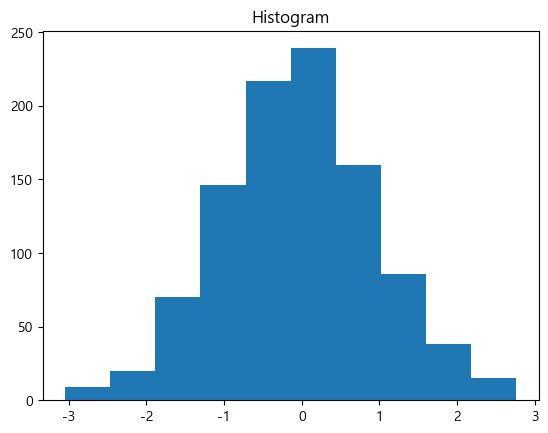

In [116]:
np.random.seed(0)
x = np.random.randn(1000)
plt.title("Histogram")
arrays, bins, patches = plt.hist(x, bins=10)

In [117]:
arrays  #각 구간에 대한 빈도수


array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.])

In [118]:
bins

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

In [119]:
patches

<BarContainer object of 10 artists>

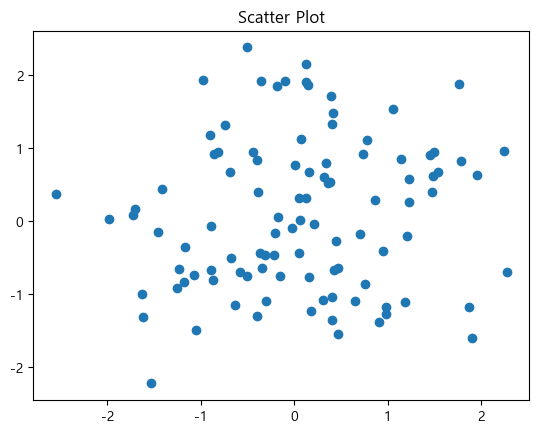

In [120]:
np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y)

In [121]:
N = 30
np.random.seed(0)
x = np.random.rand(N)
y1 = np.random.rand(N)
y2 = np.random.rand(N)
y3 = np.pi * (15 * np.random.rand(N))**2

In [127]:
y2

array([0.15896958, 0.11037514, 0.65632959, 0.13818295, 0.19658236,
       0.36872517, 0.82099323, 0.09710128, 0.83794491, 0.09609841,
       0.97645947, 0.4686512 , 0.97676109, 0.60484552, 0.73926358,
       0.03918779, 0.28280696, 0.12019656, 0.2961402 , 0.11872772,
       0.31798318, 0.41426299, 0.0641475 , 0.69247212, 0.56660145,
       0.26538949, 0.52324805, 0.09394051, 0.5759465 , 0.9292962 ])

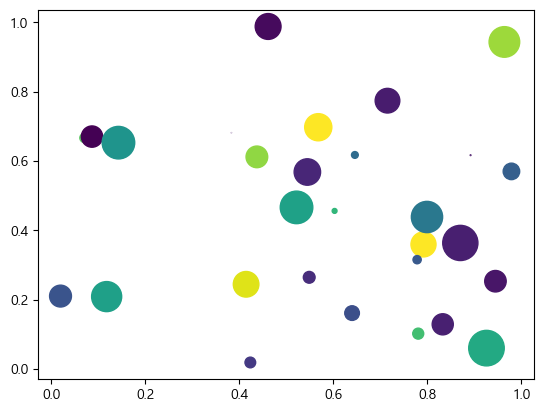

In [128]:
plt.scatter(x,y1,c=y2, s=y3)

In [129]:
from sklearn.datasets import load_digits
digits = load_digits()

In [135]:
digits.data.shape #(1797, 64)
digits.data[0].reshape(8,8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

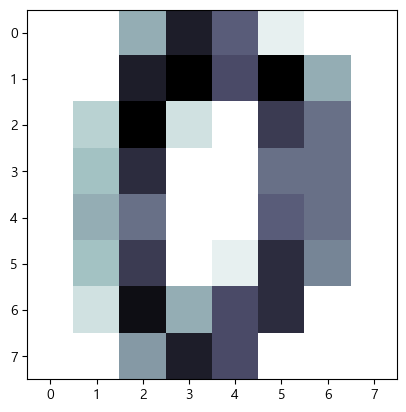

In [137]:
plt.imshow(digits.data[0].reshape(8,8), cmap=plt.cm.bone_r)

In [141]:
digits.target.shape
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [142]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [144]:
digits.images.shape #(1797, 8, 8)

(1797, 8, 8)

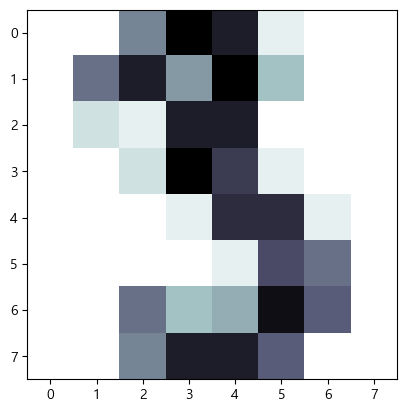

In [150]:
digits.images[0] #digits.data[0].reshape(8,8)
digits.images[3]

plt.imshow(digits.images[3], cmap=plt.cm.bone_r)

In [149]:
digits.target[3]

3

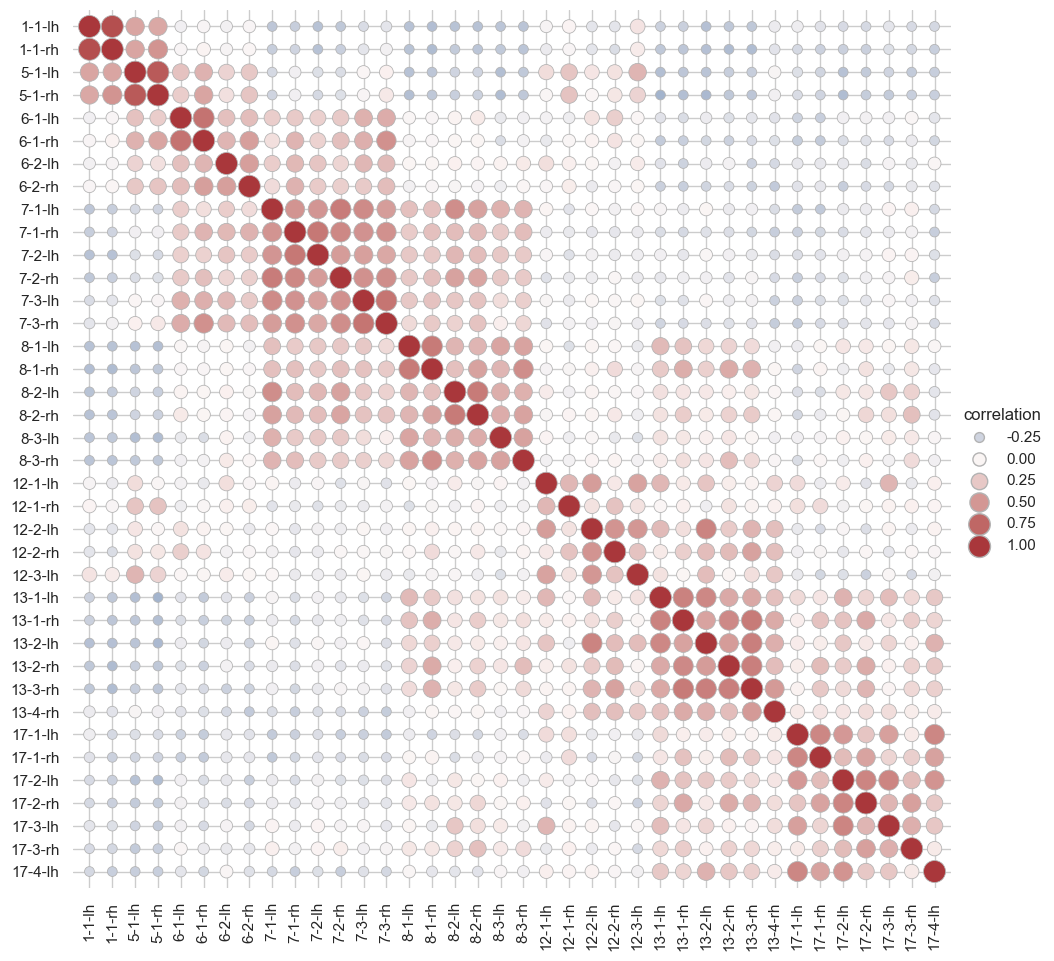

In [151]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

<Axes: >

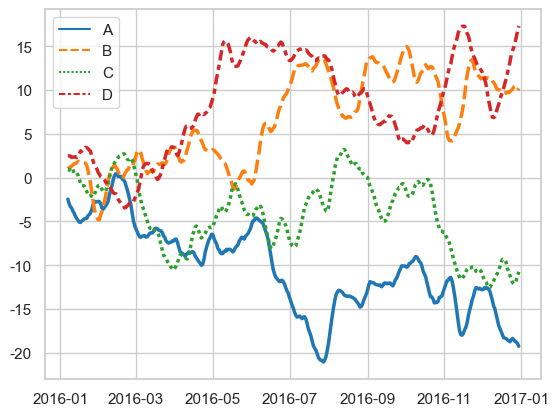

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [ ]:
matplotlib : 기본적인 시각화
seaborn : 통계 분석 시각화
plotly : matplotlib + seaborn + interactive 
tableau : matplotlib + seaborn + interactive + BM

In [153]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

In [158]:
iris.petal_length.values

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

<Axes: xlabel='petal_length'>

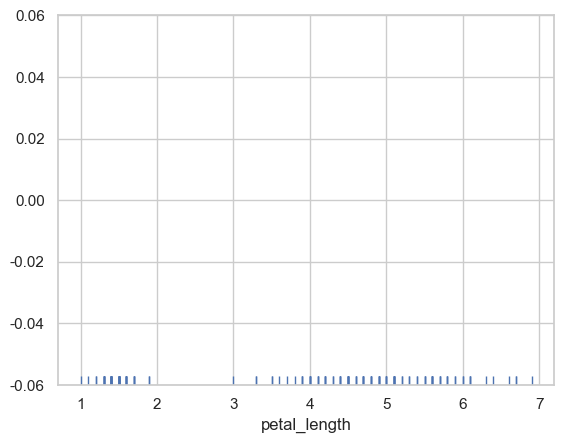

In [160]:
iris.petal_length


sns.rugplot(iris.petal_length)
#sns.rugplot(iris.petal_length.values)

In [162]:
x=iris.petal_length.values

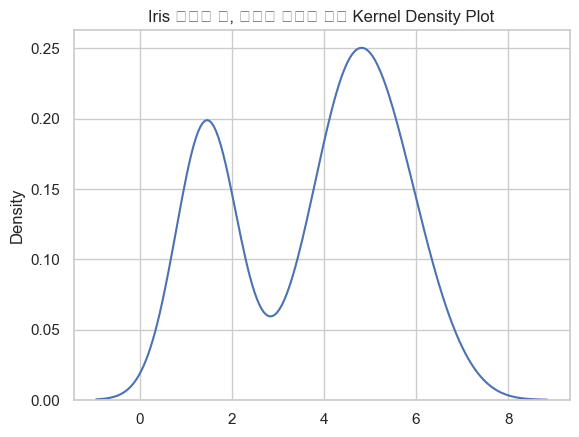

In [165]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

<Axes: ylabel='Density'>

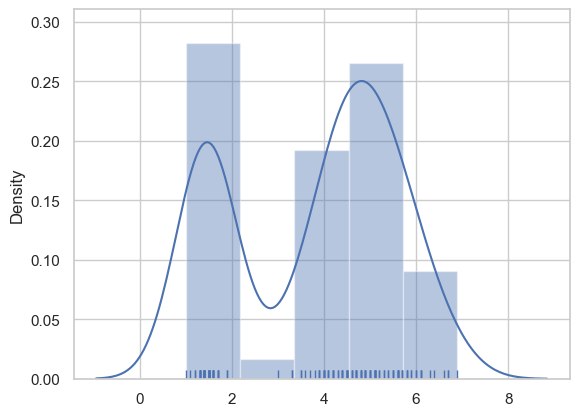

In [167]:
sns.distplot(x, rug=True)

In [168]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [169]:
#countplot : 종류별 데이터 빈도수를 시각화

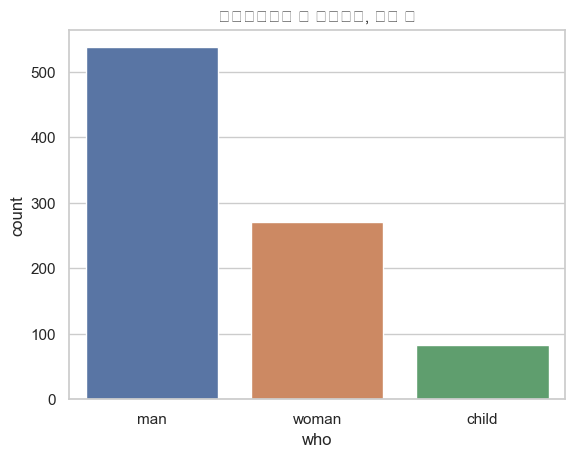

In [173]:
sns.countplot(x="who", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

In [174]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


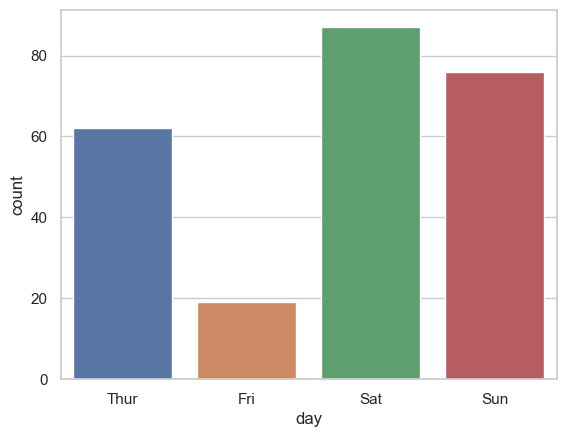

In [175]:
sns.countplot(x="day", data=tips)
plt.show()

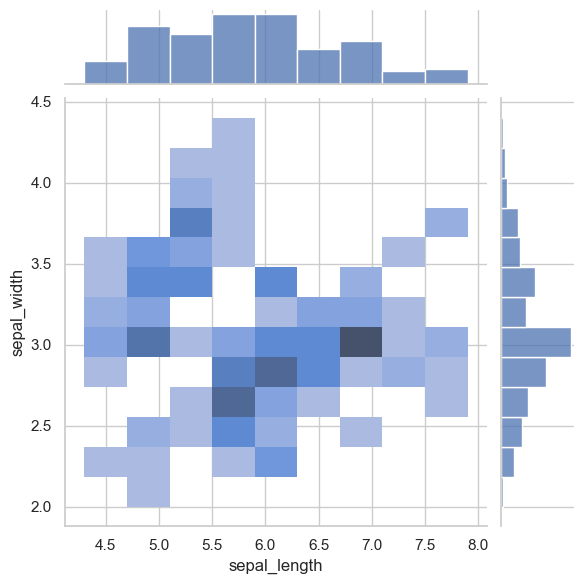

In [181]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind='hist')

In [ ]:
''

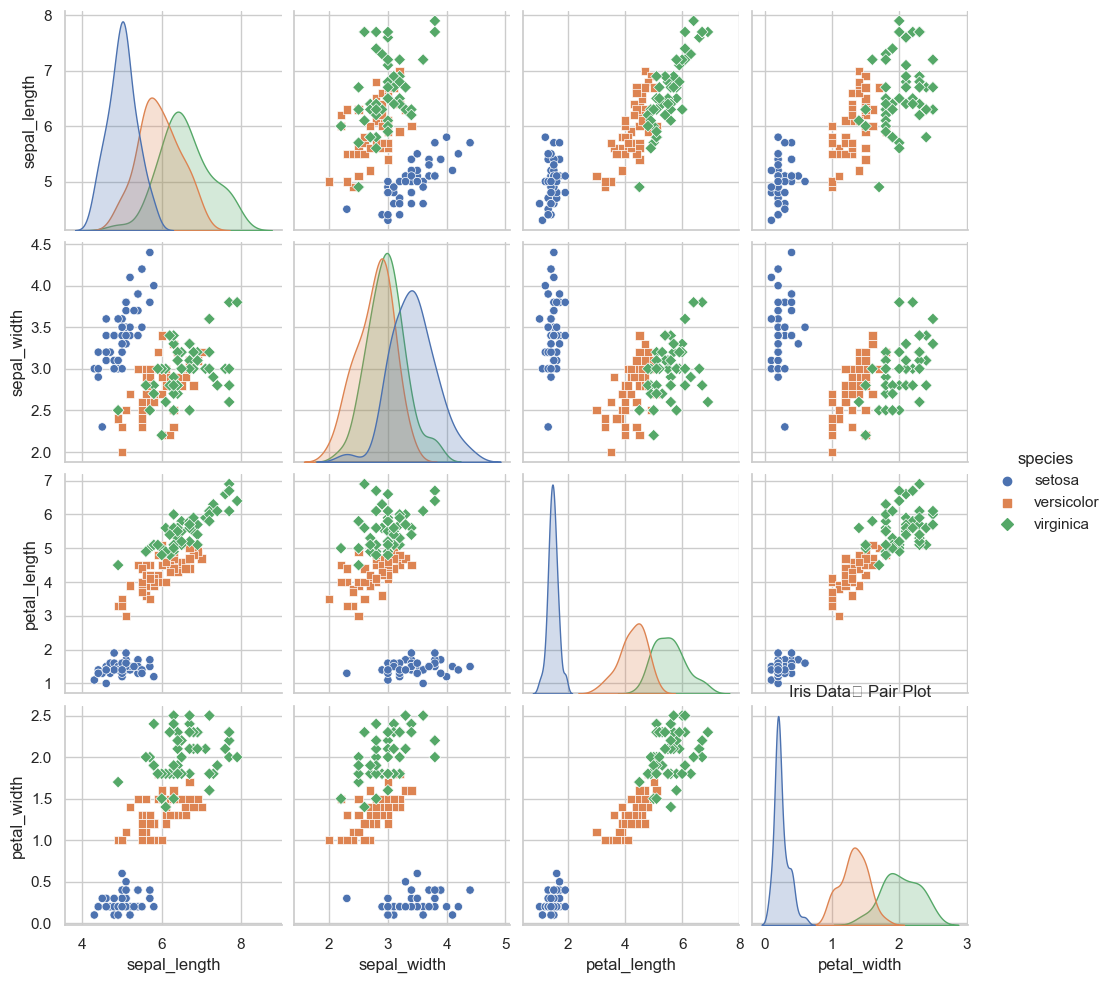

In [184]:
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
plt.title("Iris Data의 Pair Plot")
plt.show()

In [185]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
age, fare, pclass, parch, survived

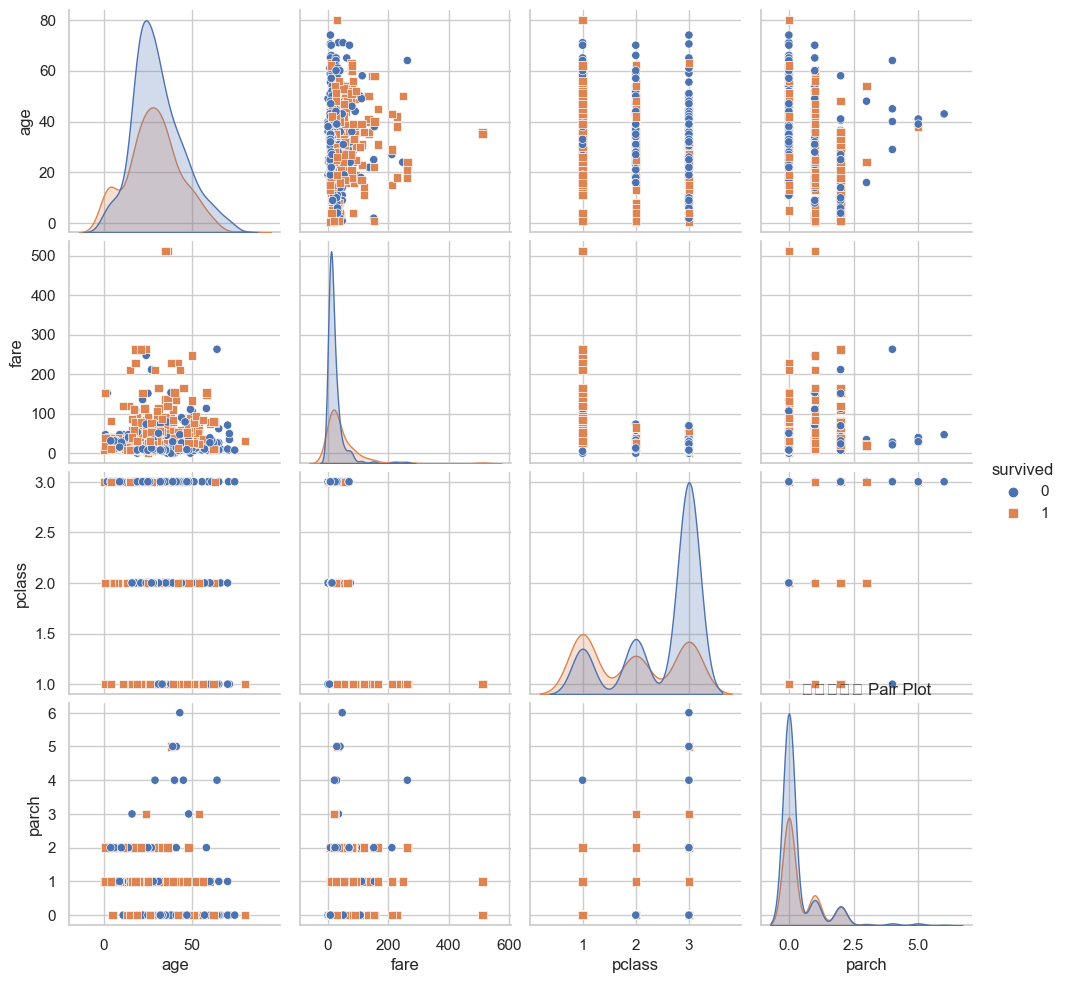

In [186]:
df=titanic[['age','fare', 'survived', 'pclass', 'parch']]
sns.pairplot( df, hue='survived', markers=["o", "s", "D","x","o"])
plt.title("타이타닉의 Pair Plot")
plt.show()

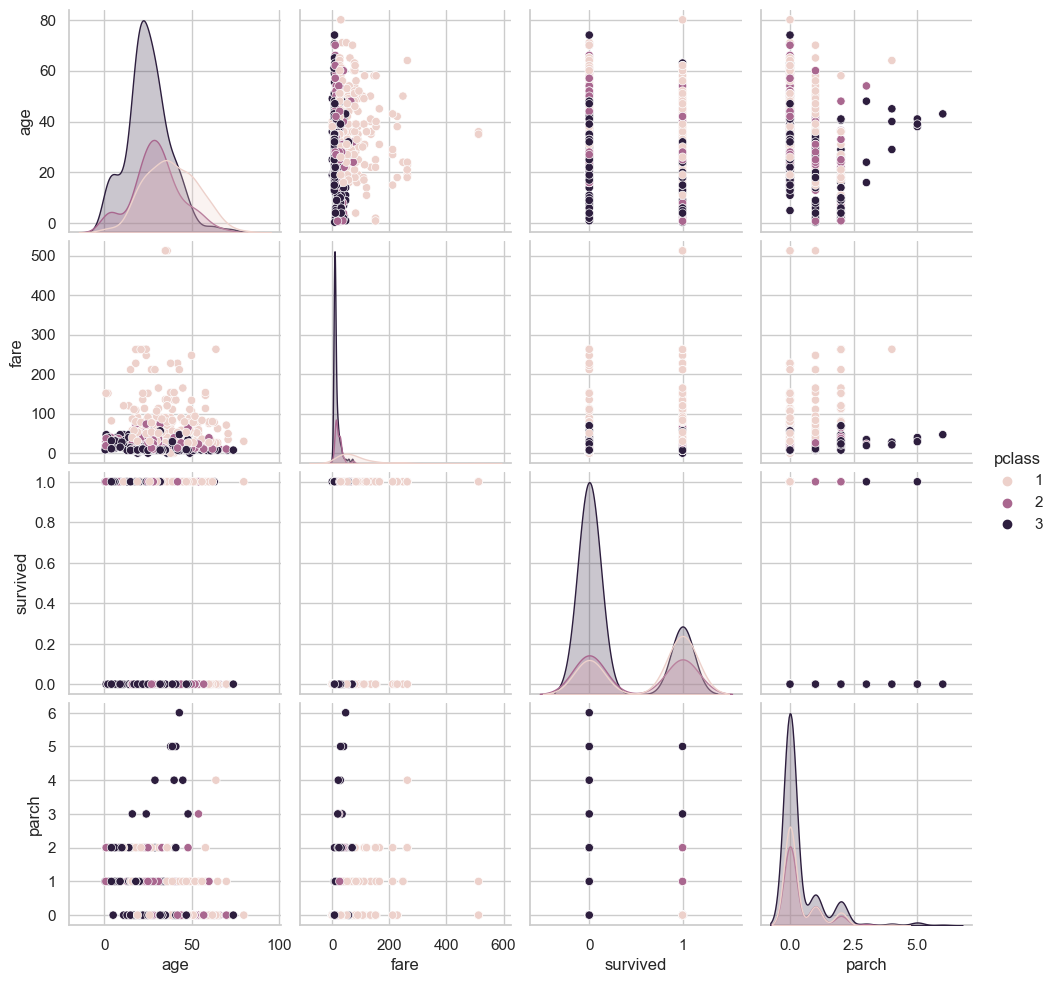

In [187]:
df = titanic[['age', 'fare', 'survived','pclass', 'parch' ]]
sns.pairplot(df, hue = 'pclass')

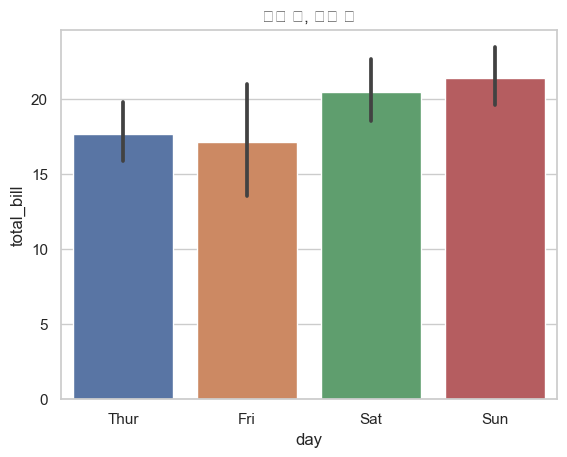

In [188]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

In [ ]:
#sns.barplot 은 평균과 편차가 출력

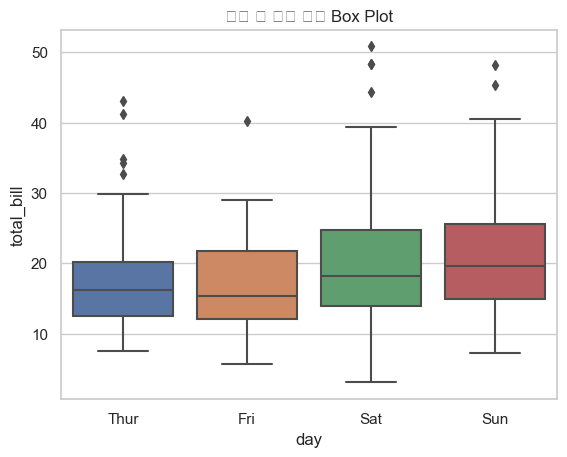

In [189]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

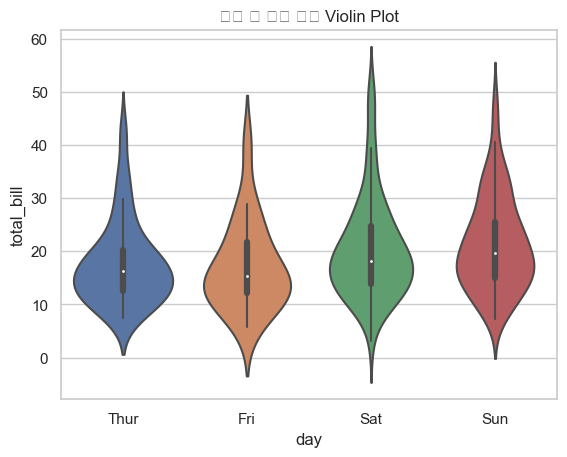

In [190]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Violin Plot")
plt.show()

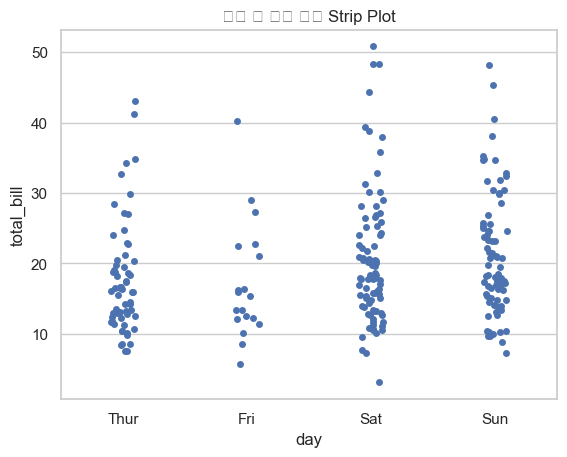

In [193]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

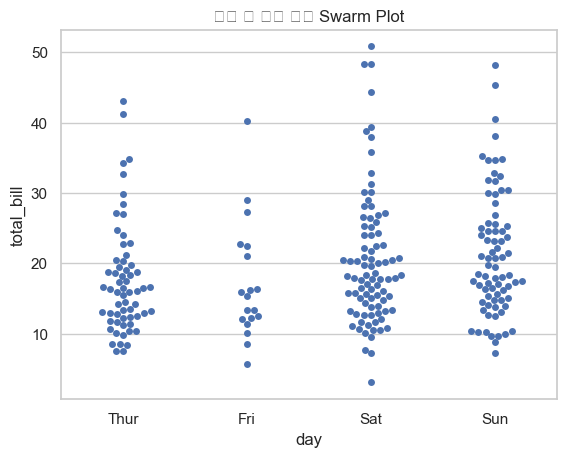

In [194]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Swarm Plot")
plt.show()

<Axes: xlabel='day', ylabel='total_bill'>

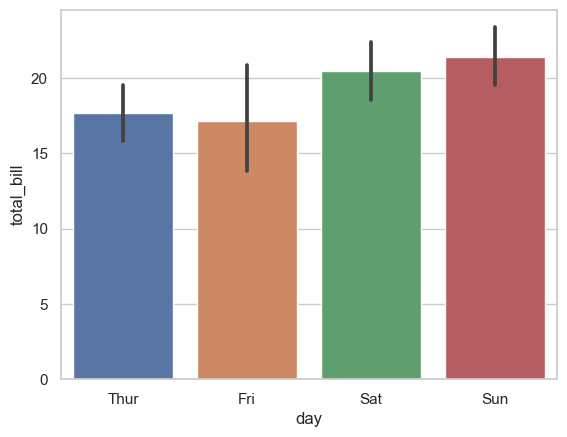

In [195]:
sns.barplot(x='day', y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

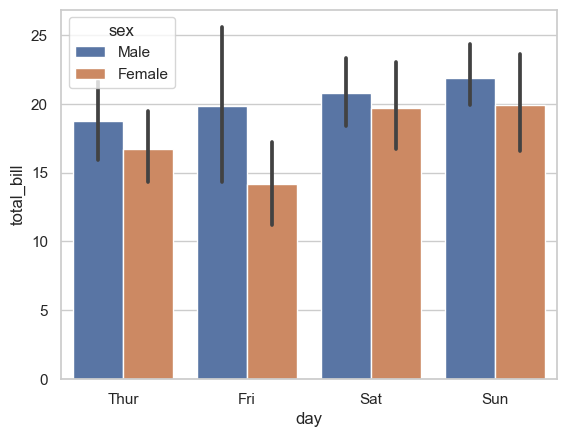

In [197]:
sns.barplot(x='day', y='total_bill', hue='sex', data=tips)

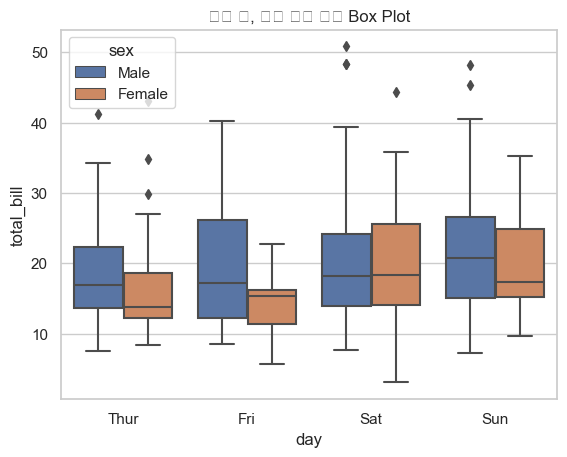

In [198]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()


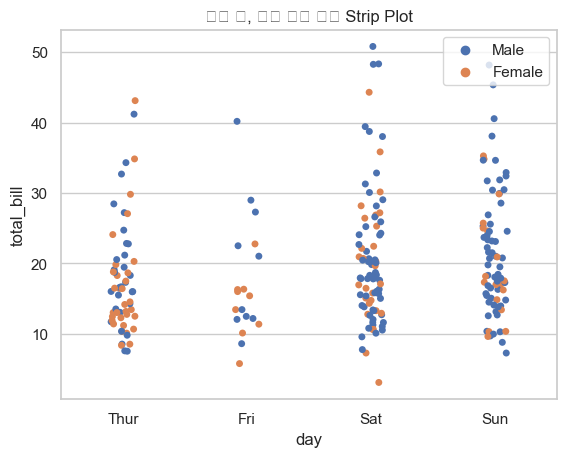

In [199]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot")
plt.legend(loc=1)
plt.show()

In [200]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<Axes: title={'center': '연도, 월 별 승객수에 대한 Heatmap'}, xlabel='year', ylabel='month'>

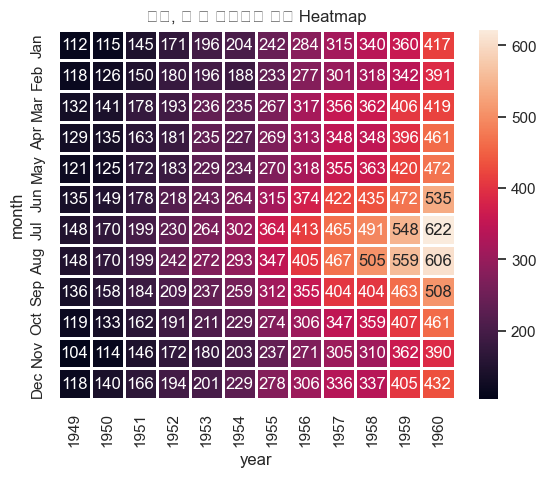

In [205]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
